In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Este Notebook é para a transformação dos dados

In [279]:
df = pd.read_csv('../../playground-series-s4e2/train.csv')
test_df = pd.read_csv("../../playground-series-s4e2/test.csv")


In [280]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Vamos transformar apenas as variaveis categoricas! Para Gênero usaremos o OneHotEnconder pq não existe grau algum entre os gêneros, ser homem ou mulher não vai influenciar no valor. Enquanto ao historico familiar yes possui um valor maior que o não, então nesse caso, mapearemos para yes ser 1 e não 0, da mesma forma para ver os que fumam (Smoke) e o monitoramento de calorias (SCC).

Enquanto ao consumo entre as refeições (CAEC), o consumo de alcool (CALC) vamos codificar para expressar a ordem dos adverbios de frequência. O mesmo para NObeyesdad, que é uma gradação, então vai ser codificado em label

Alguns números de ponto flutuante iremos arredondar, como idade, o número de refeições por dia.




In [281]:
col_to_one_hot = ['Gender']
transformador = ColumnTransformer(
    transformers=[('', OneHotEncoder(), col_to_one_hot)],
    remainder='passthrough'  # mantém as colunas não transformadas
)

In [282]:
df_transformado = transformador.fit_transform(df)

# Convertendo a saída de volta para um DataFrame (opcional)
df_transformado = pd.DataFrame(df_transformado, columns=list(transformador.get_feature_names_out(df.columns)))

df_transformado.head()


,__Gender_Female,__Gender_Male,remainder__id,remainder__Age,remainder__Height,remainder__Weight,remainder__family_history_with_overweight,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC,remainder__MTRANS,remainder__NObeyesdad
0,0.0,1.0,0,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,0.0,1,18.0,1.56,57.0,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.0,no,Automobile,Normal_Weight
2,1.0,0.0,2,18.0,1.71146,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,1.0,0.0,3,20.952737,1.71073,131.274851,yes,yes,3.0,3.0,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,0.0,1.0,4,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [283]:
col_to_one_hot = ['Gender']
transformador = ColumnTransformer(
    transformers=[('', OneHotEncoder(), col_to_one_hot)],
    remainder='passthrough'  # mantém as colunas não transformadas
)

In [284]:
df_test_transformado = transformador.fit_transform(test_df)

# Convertendo a saída de volta para um DataFrame (opcional)
df_test_transformado = pd.DataFrame(df_test_transformado, columns=list(transformador.get_feature_names_out(test_df.columns)))

df_test_transformado.head()

,__Gender_Female,__Gender_Male,remainder__id,remainder__Age,remainder__Height,remainder__Weight,remainder__family_history_with_overweight,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC,remainder__MTRANS
0,0.0,1.0,20758,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation
1,1.0,0.0,20759,21.0,1.6,66.0,yes,yes,2.0,1.0,Sometimes,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation
2,1.0,0.0,20760,26.0,1.643355,111.600553,yes,yes,3.0,3.0,Sometimes,no,2.621877,no,0.0,0.250502,Sometimes,Public_Transportation
3,0.0,1.0,20761,20.979254,1.553127,103.669116,yes,yes,2.0,2.977909,Sometimes,no,2.786417,no,0.094851,0.0,Sometimes,Public_Transportation
4,1.0,0.0,20762,26.0,1.627396,104.835346,yes,yes,3.0,3.0,Sometimes,no,2.653531,no,0.0,0.741069,Sometimes,Public_Transportation


In [285]:
df_transformado = df_transformado.rename(columns=lambda x: x.replace('remainder__', ''))
df_test_transformado = df_test_transformado.rename(columns=lambda x: x.replace('remainder__', ''))
df_transformado.head()
df_test_transformado.head()


,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,1.0,20758,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation
1,1.0,0.0,20759,21.0,1.6,66.0,yes,yes,2.0,1.0,Sometimes,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation
2,1.0,0.0,20760,26.0,1.643355,111.600553,yes,yes,3.0,3.0,Sometimes,no,2.621877,no,0.0,0.250502,Sometimes,Public_Transportation
3,0.0,1.0,20761,20.979254,1.553127,103.669116,yes,yes,2.0,2.977909,Sometimes,no,2.786417,no,0.094851,0.0,Sometimes,Public_Transportation
4,1.0,0.0,20762,26.0,1.627396,104.835346,yes,yes,3.0,3.0,Sometimes,no,2.653531,no,0.0,0.741069,Sometimes,Public_Transportation


In [286]:
df_transformado['Age'] = [ round(i) for i in df_transformado['Age']]
df_test_transformado['Age'] = [round(i) for i in df_test_transformado['Age']]
df_test_transformado.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,1.0,20758,27,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation
1,1.0,0.0,20759,21,1.6,66.0,yes,yes,2.0,1.0,Sometimes,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation
2,1.0,0.0,20760,26,1.643355,111.600553,yes,yes,3.0,3.0,Sometimes,no,2.621877,no,0.0,0.250502,Sometimes,Public_Transportation
3,0.0,1.0,20761,21,1.553127,103.669116,yes,yes,2.0,2.977909,Sometimes,no,2.786417,no,0.094851,0.0,Sometimes,Public_Transportation
4,1.0,0.0,20762,26,1.627396,104.835346,yes,yes,3.0,3.0,Sometimes,no,2.653531,no,0.0,0.741069,Sometimes,Public_Transportation


Decidimos arredondar alguns valores que não fazem sentindo algum serem flutuantes, como a idade acima, o numero de refeições por dia(NCP)

Mapeamos aqueles com histórico de sobrepeso na familia, 1 sendo yes e 0 no. Diferente daqueles que monitoram o consumo de calorias (SCC), normalmente quem faz isso está passando por uma dieta, ou mantem algum tipo

In [287]:
df_transformado['NCP'] = [round(i) for i in df_transformado['NCP']]
df_test_transformado['NCP'] = [round(i) for i in df_test_transformado['NCP']]


In [288]:
mapping = {'no' : 0, 'yes':1}
df_transformado['family_history_with_overweight'] = df_transformado['family_history_with_overweight'].map(mapping)
df_test_transformado['family_history_with_overweight'] = df_test_transformado['family_history_with_overweight'].map(mapping)

In [289]:
df_transformado.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,1.0,0,24,1.699998,81.66995,1,yes,2.0,3,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,0.0,1,18,1.56,57.0,1,yes,2.0,3,Frequently,no,2.0,no,1.0,1.0,no,Automobile,Normal_Weight
2,1.0,0.0,2,18,1.71146,50.165754,1,yes,1.880534,1,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,1.0,0.0,3,21,1.71073,131.274851,1,yes,3.0,3,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,0.0,1.0,4,32,1.914186,93.798055,1,yes,2.679664,2,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [290]:
df_transformado['SCC'] = df_transformado['SCC'].map({'no': 1,'yes':0})
df_test_transformado['SCC'] = df_test_transformado['SCC'].map({'no': 1,'yes':0})
df_transformado.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,1.0,0,24,1.699998,81.66995,1,yes,2.0,3,Sometimes,no,2.763573,1,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,0.0,1,18,1.56,57.0,1,yes,2.0,3,Frequently,no,2.0,1,1.0,1.0,no,Automobile,Normal_Weight
2,1.0,0.0,2,18,1.71146,50.165754,1,yes,1.880534,1,Sometimes,no,1.910378,1,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,1.0,0.0,3,21,1.71073,131.274851,1,yes,3.0,3,Sometimes,no,1.674061,1,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,0.0,1.0,4,32,1.914186,93.798055,1,yes,2.679664,2,Sometimes,no,1.979848,1,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Codificando de 0 a 6 de acordo com o grau de obesidade, em seguida vamos remover a coluna MTRANS, conforme vimos do dataframe anterior, maior parte dos usuários usam transporte público

In [291]:
Nobeyesdad = {'Overweight_Level_II': 3, 'Normal_Weight': 1, 'Insufficient_Weight': 0,
              'Obesity_Type_III': 6, 'Obesity_Type_II': 5, 'Overweight_Level_I': 2,
              'Obesity_Type_I': 4}



# Mapeamento para 'NObeyesdad'
df_transformado['NObeyesdad'] = df_transformado['NObeyesdad'].map(Nobeyesdad)

df_transformado.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,1.0,0,24,1.699998,81.66995,1,yes,2.0,3,Sometimes,no,2.763573,1,0.0,0.976473,Sometimes,Public_Transportation,3
1,1.0,0.0,1,18,1.56,57.0,1,yes,2.0,3,Frequently,no,2.0,1,1.0,1.0,no,Automobile,1
2,1.0,0.0,2,18,1.71146,50.165754,1,yes,1.880534,1,Sometimes,no,1.910378,1,0.866045,1.673584,no,Public_Transportation,0
3,1.0,0.0,3,21,1.71073,131.274851,1,yes,3.0,3,Sometimes,no,1.674061,1,1.467863,0.780199,Sometimes,Public_Transportation,6
4,0.0,1.0,4,32,1.914186,93.798055,1,yes,2.679664,2,Sometimes,no,1.979848,1,1.967973,0.931721,Sometimes,Public_Transportation,3


In [292]:
df_transformado = df_transformado.drop('MTRANS', axis=1)
df_test_transformado = df_test_transformado.drop('MTRANS',axis=1)

Quanto ao consumo de vegetais e hortaliças, também arredondaremos, assim como vimos no violin plot, existe altas concentrações de dados ao redor de 2 e 3.

Ao consumo de comida de altas calorias(FAVC), faremos yes =1 e no =0. O mesmo para se o usuário for fumante( SMOKE)

In [293]:
df_transformado['FCVC'] = [round(i) for i in df_transformado['FCVC']]
df_test_transformado['FCVC'] = [round(i) for i in df_test_transformado['FCVC']]

In [294]:
df_transformado['FAVC'] = df_transformado['FAVC'].map(mapping)
df_test_transformado['FAVC'] = df_test_transformado['FAVC'].map(mapping)

df_transformado['SMOKE'] = df_transformado['SMOKE'].map(mapping)
df_test_transformado['SMOKE'] = df_test_transformado['SMOKE'].map(mapping)

In [295]:
df_transformado.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0.0,1.0,0,24,1.699998,81.66995,1,1,2,3,Sometimes,0,2.763573,1,0.0,0.976473,Sometimes,3
1,1.0,0.0,1,18,1.56,57.0,1,1,2,3,Frequently,0,2.0,1,1.0,1.0,no,1
2,1.0,0.0,2,18,1.71146,50.165754,1,1,2,1,Sometimes,0,1.910378,1,0.866045,1.673584,no,0
3,1.0,0.0,3,21,1.71073,131.274851,1,1,3,3,Sometimes,0,1.674061,1,1.467863,0.780199,Sometimes,6
4,0.0,1.0,4,32,1.914186,93.798055,1,1,3,2,Sometimes,0,1.979848,1,1.967973,0.931721,Sometimes,3


Como vimos na leitura de dados, observamos que há uma contagem muito grande de obesos que comem entre as refeições ( CAEC), então o dataframe vai ser mapeado na ordem do maping3, o mesmo para consumo de alcool ( CALC)

In [296]:
mapping3 = {'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0}

df_transformado['CAEC'] = df_transformado['CAEC'].map(mapping3)
df_test_transformado['CAEC'] = df_test_transformado['CAEC'].map(mapping3)

df_transformado.head()



,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0.0,1.0,0,24,1.699998,81.66995,1,1,2,3,1,0,2.763573,1,0.0,0.976473,Sometimes,3
1,1.0,0.0,1,18,1.56,57.0,1,1,2,3,2,0,2.0,1,1.0,1.0,no,1
2,1.0,0.0,2,18,1.71146,50.165754,1,1,2,1,1,0,1.910378,1,0.866045,1.673584,no,0
3,1.0,0.0,3,21,1.71073,131.274851,1,1,3,3,1,0,1.674061,1,1.467863,0.780199,Sometimes,6
4,0.0,1.0,4,32,1.914186,93.798055,1,1,3,2,1,0,1.979848,1,1.967973,0.931721,Sometimes,3


In [297]:
df_transformado['CALC'] = df_transformado['CALC'].map(mapping3)
df_test_transformado['CALC'] = df_test_transformado['CALC'].map(mapping3)

df_transformado.head()


,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0.0,1.0,0,24,1.699998,81.66995,1,1,2,3,1,0,2.763573,1,0.0,0.976473,1,3
1,1.0,0.0,1,18,1.56,57.0,1,1,2,3,2,0,2.0,1,1.0,1.0,0,1
2,1.0,0.0,2,18,1.71146,50.165754,1,1,2,1,1,0,1.910378,1,0.866045,1.673584,0,0
3,1.0,0.0,3,21,1.71073,131.274851,1,1,3,3,1,0,1.674061,1,1.467863,0.780199,1,6
4,0.0,1.0,4,32,1.914186,93.798055,1,1,3,2,1,0,1.979848,1,1.967973,0.931721,1,3


In [298]:
df_transformado.to_pickle('df_transformado.pkl')
df_test_transformado.to_pickle('df_test_transformado.pkl')

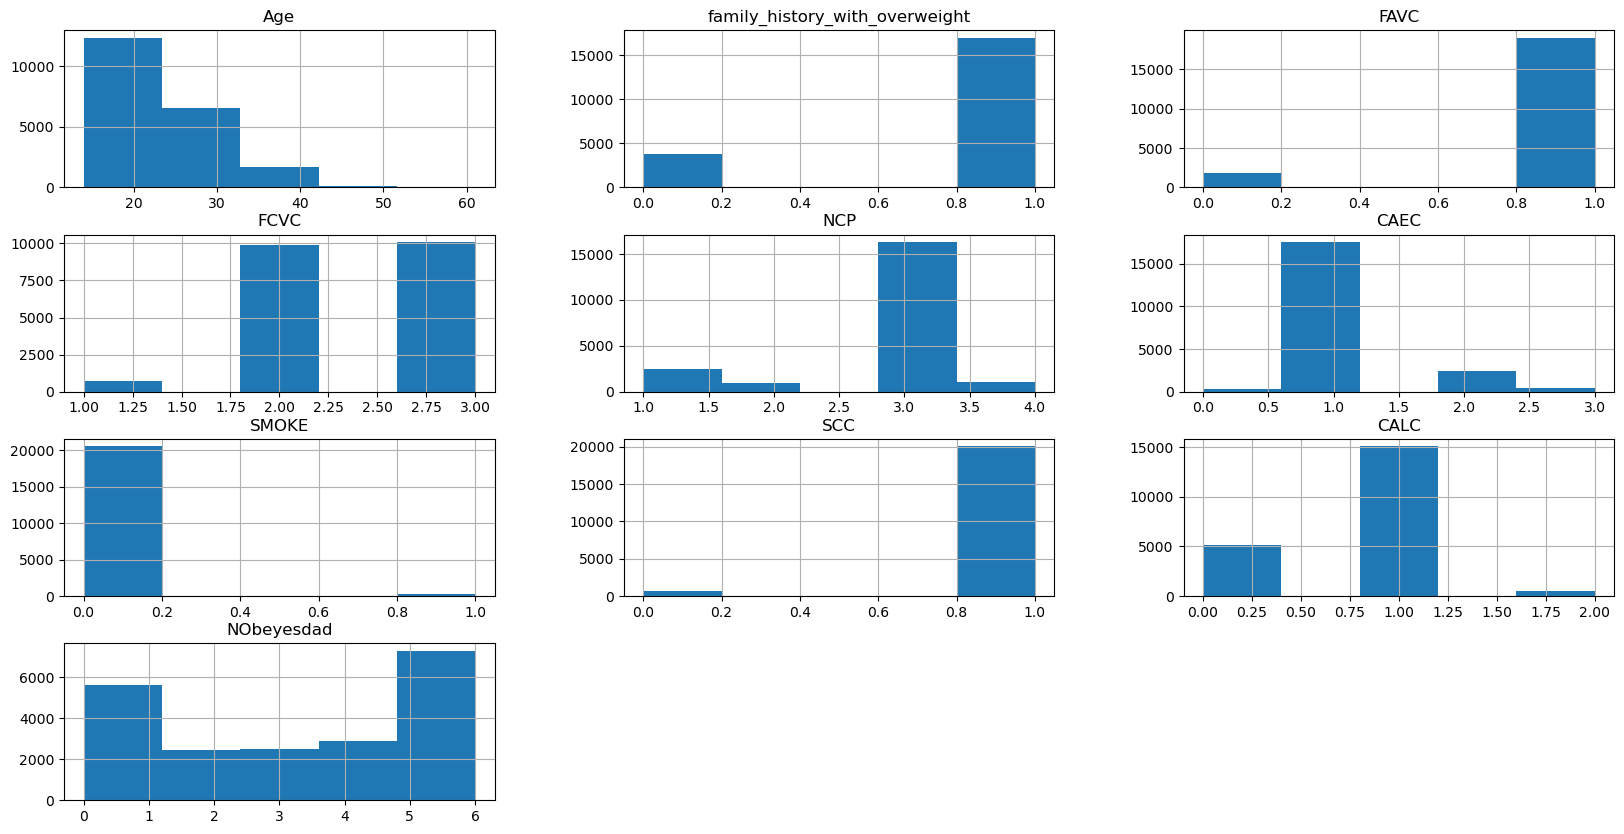

In [299]:
df_transformado.hist(bins=5, figsize=(20, 10))
plt.show()

Ao decorrer do notebook, tentamos arredondar FAF, TUE e CH2O. Todavia apresentou uma perda de desempenho do modelo, tentamos para números inteiros e números multiplos de 0.5, como 1.0, 1.5, 2.0. Ao arredontar para números inteiros, perdemos desempenho no notebook seguinte, e ao arredondar para múltiplos de 0.5 não teve diferença nos dados de treinos.